In [15]:
import pandas as pd
import matplotlib.pyplot as plt
from stockstats import StockDataFrame 
import numpy as np
import pysentiment as ps
hiv4 = ps.HIV4()
data=pd.read_csv("AAPL.csv")
data_sum=data["SUMMARY"]
data_time=data["PUBLICATION_DATE"]
#print(data_time)
print(data_time.dtypes)
f_time=pd.to_datetime(data_time)
print(f_time.dtypes)
import datetime, time

time.mktime(f_time.timetuple())
print(t+t.dtype)

C:\Users\Utente\Anaconda3\lib\site-packages\IPython\core\interactiveshell.py:2881: DtypeWarning: Columns (63,108,109,110,176) have mixed types. Specify dtype option on import or set low_memory=False.
  exec(code_obj, self.user_global_ns, self.user_ns)


object
datetime64[ns]


AttributeError: 'Series' object has no attribute 'timetuple'

In [ ]:
sentiment=np.array([])
score=np.array([])
for row in data_sum.T.iteritems():
    tokens = hiv4.tokenize(row[1] )
    score = hiv4.get_score(tokens)
    print(score)
    sub=np.multiply(score['Subjectivity'],10000)
    f_score=np.multiply(score['Polarity'],sub)
    f_score=np.multiply(f_score,0.001)
    sentiment=np.append(sentiment,f_score)
    
    #sentiment.append(score,axis=0)
    #sentiment.add(score)
    #sentiment=np.concatenate(sentiment , score)
    #score=pd.concat([score, hiv4.get_score(tokens)], axis=0)
    
   


 # text can be tokenized by other ways
                                  # however, dict in HIV4 is preprocessed
                                  # by the default tokenizer in the library




In [6]:
print(sentiment)

[-0.5         0.33333333 -0.42857143 ..., -0.2         0.          1.        ]


In [7]:
sentiment=np.transpose(sentiment)
print(sentiment)

[-0.5         0.33333333 -0.42857143 ..., -0.2         0.          1.        ]


In [8]:
columns=[]

sentiment= pd.DataFrame(np.reshape(sentiment, (len(sentiment),1)),columns=['open'])
print(sentiment)

          open
0    -0.500000
1     0.333333
2    -0.428571
3    -0.428571
4     1.000000
5     0.500000
6     0.500000
7     1.000000
8     0.000000
9     0.250000
10    0.000000
11   -0.600000
12    0.000000
13    1.000000
14    0.333333
15    0.000000
16    1.000000
17    0.428571
18    0.000000
19    1.000000
20    0.500000
21    0.000000
22    0.000000
23    0.000000
24    0.666667
25    0.000000
26    0.333333
27    0.333333
28   -1.000000
29    0.500000
...        ...
9970 -1.000000
9971  1.000000
9972  0.333333
9973 -0.333333
9974  1.000000
9975  0.600000
9976  0.333333
9977  1.000000
9978  1.000000
9979  0.000000
9980  0.000000
9981  1.000000
9982  1.000000
9983  1.000000
9984 -1.000000
9985  1.000000
9986  1.000000
9987  0.000000
9988  0.000000
9989  1.000000
9990 -0.333333
9991 -0.500000
9992  1.000000
9993 -1.000000
9994 -0.142857
9995  1.000000
9996 -1.000000
9997 -0.200000
9998  0.000000
9999  1.000000

[10000 rows x 1 columns]


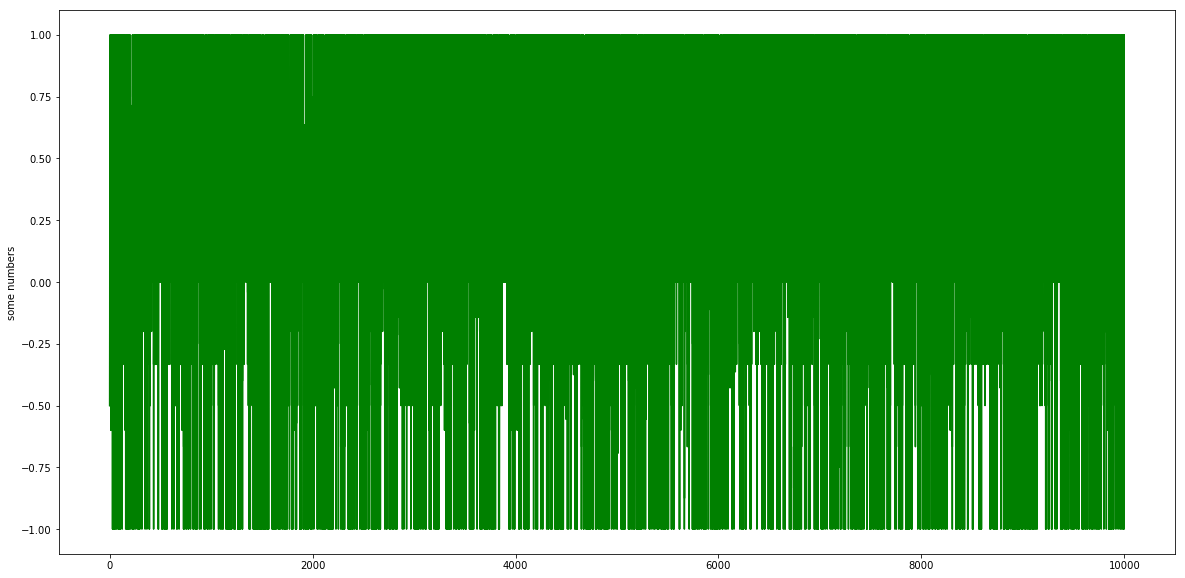

In [9]:
stock = StockDataFrame.retype(sentiment)
ema=stock['open_2_sma']
plt.figure(figsize=(20,10))
plt.plot(stock,'g')
plt.ylabel('some numbers')
plt.show()